In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../housing.csv")
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

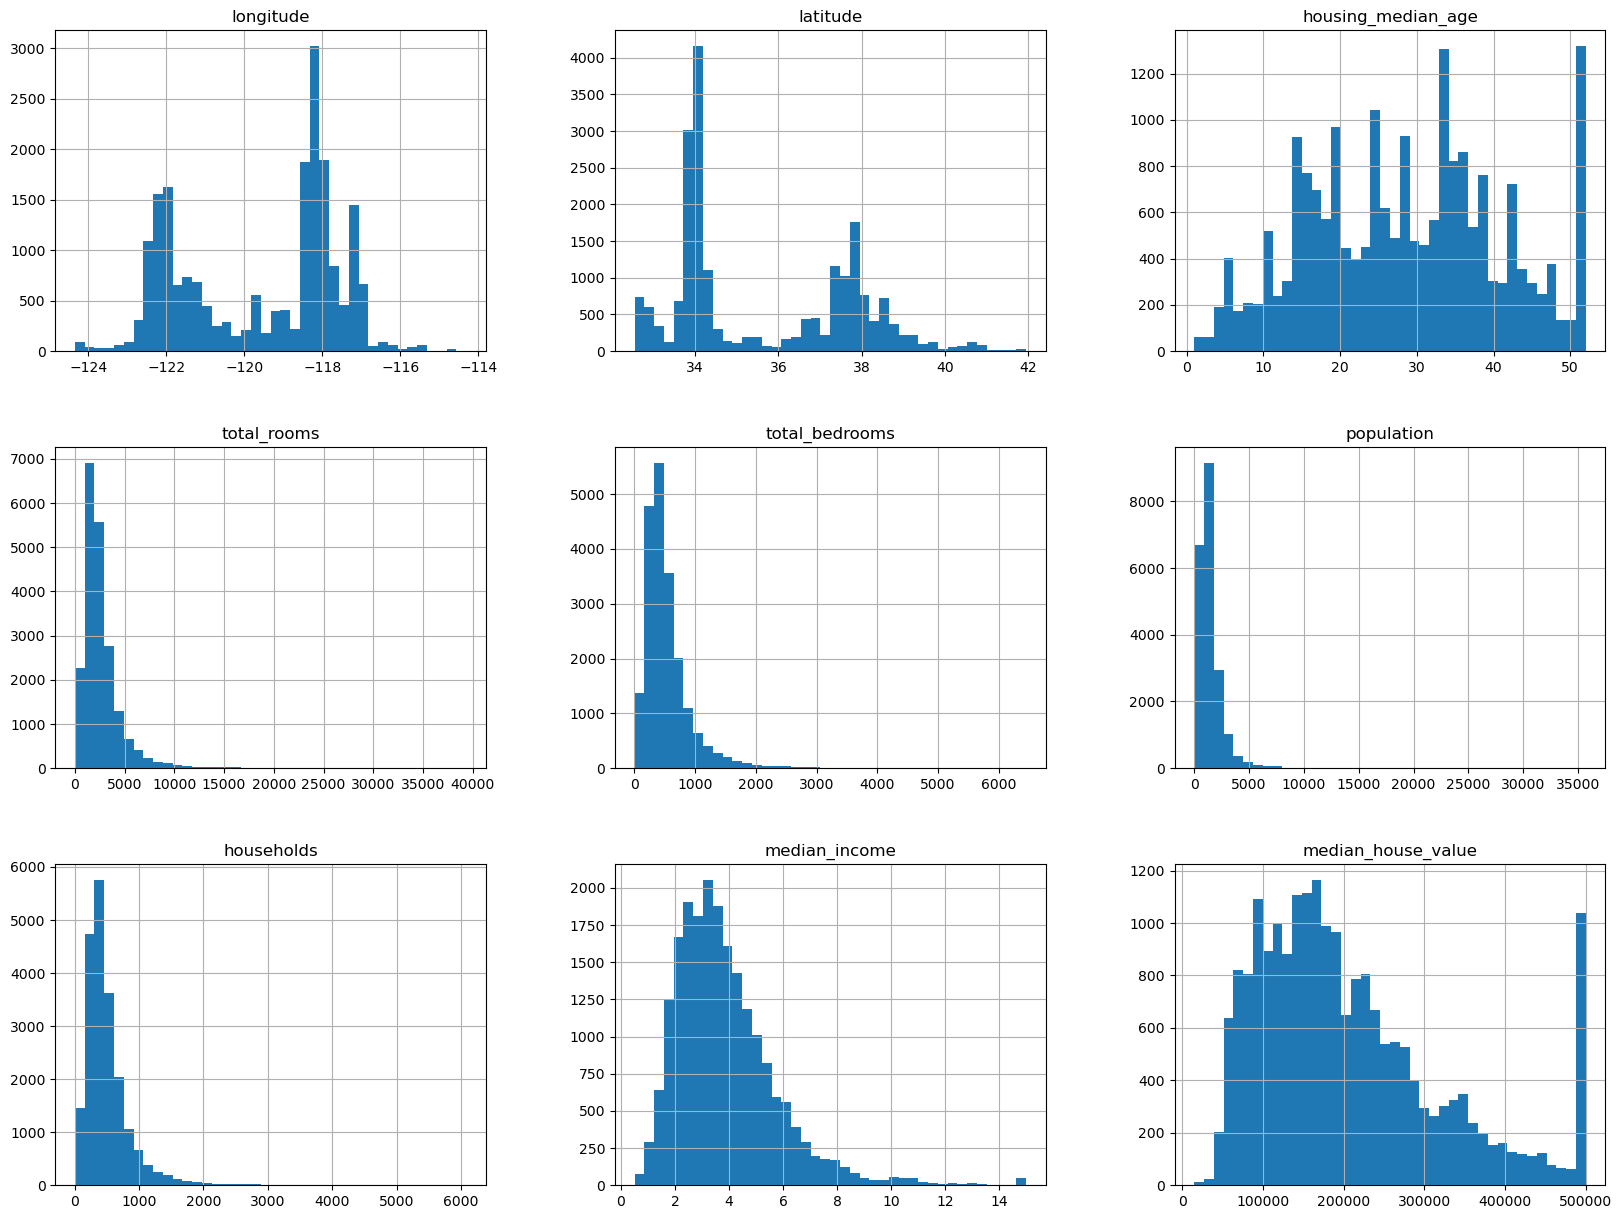

In [5]:
data.hist(bins=40, figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

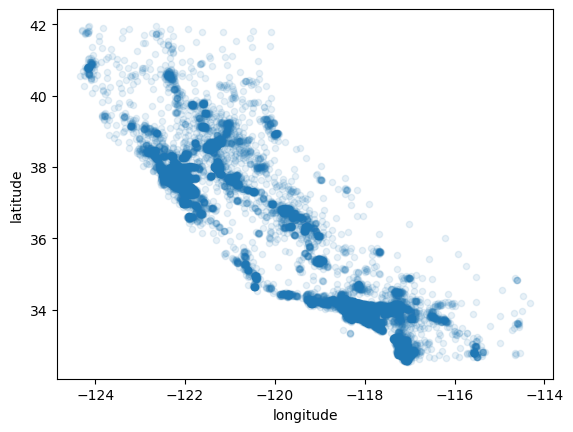

In [43]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

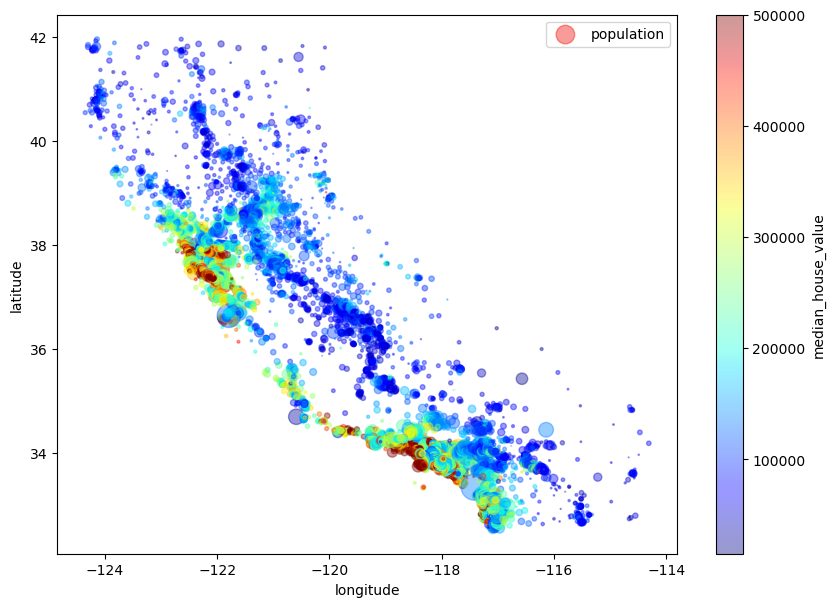

In [44]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
          s=data["population"]/100, label="population", figsize=(10,7),c= "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

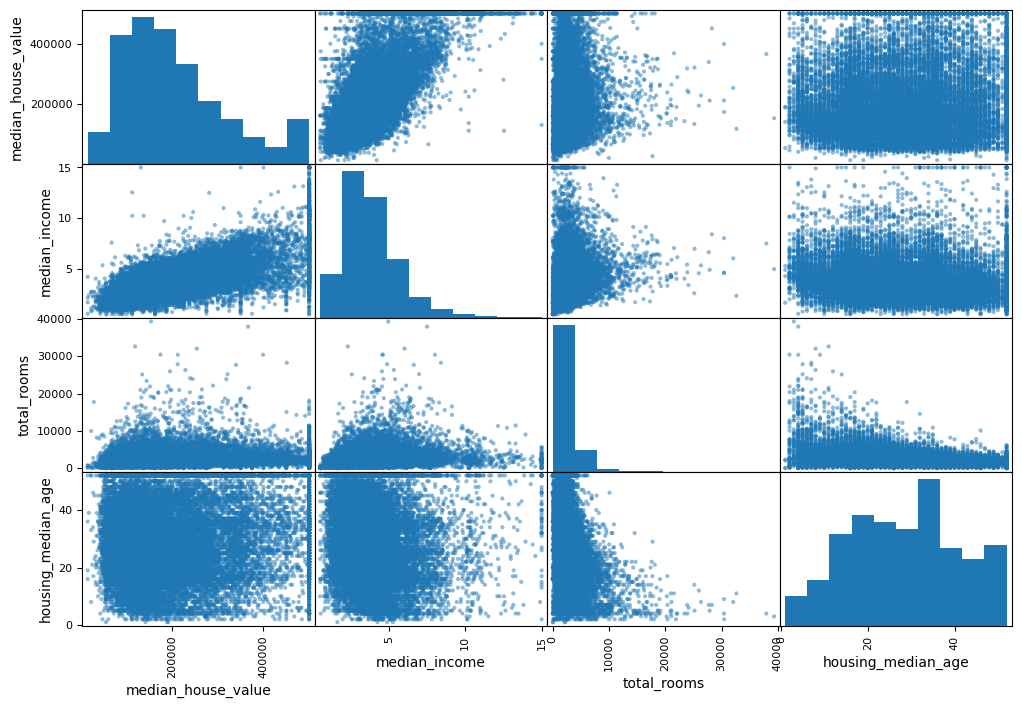

In [45]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(data[attributes], figsize=(12, 8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

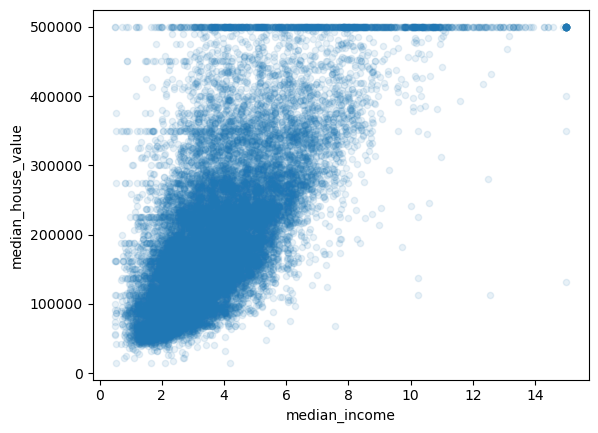

In [46]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [49]:
# data_corr = data.drop("ocean_proximity", axis=1)
# corr_matrix = data_corr.corr()
# a = corr_matrix["median_house_value"].sort_values(ascending=False)
# a

In [50]:
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,5.329513,0.219892,2.123209


In [29]:
data.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

In [35]:
data = data.dropna(subset=["total_bedrooms"])
data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0.0,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0.0,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0.0,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0.0,5.329513,0.219892,2.123209


In [41]:
data_location = data["ocean_proximity"]
data_location


0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
20635    0.0
20636    0.0
20637    0.0
20638    0.0
20639    0.0
Name: ocean_proximity, Length: 20433, dtype: float64

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
CT = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[8])],remainder='passthrough')
data_ct =np.array(CT.fit_transform(data))
print(data_ct)

  (np.int32(0), np.int32(3658))	1.0
  (np.int32(0), np.int32(3833))	-122.23
  (np.int32(0), np.int32(3834))	37.88
  (np.int32(0), np.int32(3835))	41.0
  (np.int32(0), np.int32(3836))	880.0
  (np.int32(0), np.int32(3837))	129.0
  (np.int32(0), np.int32(3838))	322.0
  (np.int32(0), np.int32(3839))	126.0
  (np.int32(0), np.int32(3840))	8.3252
  (np.int32(0), np.int32(3842))	6.984126984126984
  (np.int32(0), np.int32(3843))	0.14659090909090908
  (np.int32(0), np.int32(3844))	2.5555555555555554
  (np.int32(1), np.int32(3069))	1.0
  (np.int32(1), np.int32(3833))	-122.22
  (np.int32(1), np.int32(3834))	37.86
  (np.int32(1), np.int32(3835))	21.0
  (np.int32(1), np.int32(3836))	7099.0
  (np.int32(1), np.int32(3837))	1106.0
  (np.int32(1), np.int32(3838))	2401.0
  (np.int32(1), np.int32(3839))	1138.0
  (np.int32(1), np.int32(3840))	8.3014
  (np.int32(1), np.int32(3842))	6.238137082601054
  (np.int32(1), np.int32(3843))	0.15579659106916466
  (np.int32(1), np.int32(3844))	2.109841827768014
  (np.i

In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline


col = ColumnTransformer(
    [
        ("cat" , OneHotEncoder() , [["ocean_proximity"]]),("num",StandardScaler(),["median_income", "total_rooms", "housing_median_age","rooms_per_household", "bedrooms_per_room","population_per_household"])
    ]
    ,
    remainder="passthrough"
     
)

data_onehot_and_staandard = col.fit_transform(data)
data_onehot_and_staandard

TypeError: unhashable type: 'list'

In [ ]:
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())  # or RobustScaler
    ]), numerical_cols),
    ('cat', OneHotEncoder(sparse_output=False), categorical_cols)
])

# Combine with model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

For knn DATA 

MSE: 9868228642.531551
RMSE: 99338.95833222508
R² Score: 0.24693520829056625


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data["ocean_proximity"] = encoder.fit_transform(data[["ocean_proximity"]])
data
data_knn = data.copy()
data_iterative = data.copy()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from sklearn.impute import KNNImputer

# Create KNN imputer (k=5 is default, can be tuned)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply imputer
data_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(data_knn), columns=data.columns)

# Check missing values
print(data_knn_imputed.isnull().sum())

from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

iter_imputer = IterativeImputer(random_state=0)
data_iter_imputed = pd.DataFrame(iter_imputer.fit_transform(data), columns=data.columns)
print(data_iter_imputed.isnull().sum())
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features (X) and Target (y)
X = data_knn_imputed.drop("median_house_value", axis=1)
y = data_knn_imputed["median_house_value"]

# Split dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize model
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Train model
knn_reg.fit(x_train, y_train)

# Predictions
y_pred = knn_reg.predict(x_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

from sklearn.model_selection import train_test_split
